In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


# What is Ktrain ?

ktrain is a Python library that provides a high-level interface for using deep learning models, particularly for natural language processing (NLP) tasks. It is built on top of the keras deep learning framework and is designed to be easy to use, especially for users who are new to deep learning.

One of the main strengths of ktrain is its ability to simplify the process of using pre-trained language models, such as BERT (Bidirectional Encoder Representations from Transformers). BERT is a powerful NLP model developed by Google, and it has achieved state-of-the-art results in a wide range of NLP tasks, including text classification, sentiment analysis, question answering, and more.

In [19]:
!pip3 install ktrain

# Importing Libraries

In [20]:
#Importing
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split

In [21]:
import pandas as pd
import numpy as np


In [22]:
df=pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [23]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


convert the sentiment feature to numerical feature 

In [24]:
df["sentiment"]=df["sentiment"].map({"positive":1,"negative":0})

Spliting the data into training dataset and validation dataset to test the prerformance of the model 

In [25]:
random_seed = 12342

x_train, x_val, y_train, y_val = train_test_split(df['review'], df['sentiment'], shuffle=True, test_size = 0.2, random_state=random_seed, stratify=df['sentiment'])

Convert the dataset into arrays for the preprocessing step

In [26]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val=np.array(x_val)
y_val=np.array(y_val)

In [27]:
x_train

array(['Simply put: the movie is boring. Cliché upon cliché is confirmed and story lines never come together. It seems as if the director was unsure whether to make a movie or a documentary. The main plot is very thin (a CIA agent is ordered to kill an oil prince, gets caught and then warns the prince (why?)) and therefore some elements were added to make the movie more interesting. So, a kid dies, which results in the "natural" response of the father: freely advising the person indirectly responsible for his son\'s death. The lawyer has a drunk "friend" and keeps him around, why, no one knows. Some kids become suicide terrorists and blow up a ship.<br /><br />All in all, this is one of the worst movies I have seen in quite a while. I was neither entertained nor intellectually challenged. I neither laughed nor cried, I did not gain an understanding nor was I compelled to learn more or take up a cause. It meant nothing to me, which in my eyes is the worst one can say about a movie.',
  

# Preprocessing 

Ktrain provides the ability to automaticly preprocess the data for the pretrained bert model by converting it to features of bert 

In [28]:
(x_train_bert,y_train_bert),(x_valid_bert,y_valid_bert),preproc=text.texts_from_array(x_train=x_train,y_train=y_train,x_test=x_val,y_test=y_val,
                                                                             class_names=["0","1"],
                                                                             preprocess_mode='bert',
                                                                             lang="en",
                                                                             maxlen=65,
                                                                             max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


# Load Bert in a learner object

In [29]:
model=text.text_classifier('bert',train_data=(x_train_bert,y_train_bert),preproc=preproc)
learner=ktrain.get_learner(model,train_data=(x_train_bert,y_train_bert),val_data=(x_valid_bert,y_valid_bert),batch_size=16)

Is Multi-Label? False
maxlen is 65


/opt/conda/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


ktrain provides a beautiful option wich is to find the best learning rate for the model to minimize thr loss function and improve the performance of the model

# Training (Finetuning the BERT Classifier)


In [30]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
2500/2500 [==============================] - 364s 138ms/step - loss: 2.3150 - accuracy: 0.6022


/opt/conda/lib/python3.10/site-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


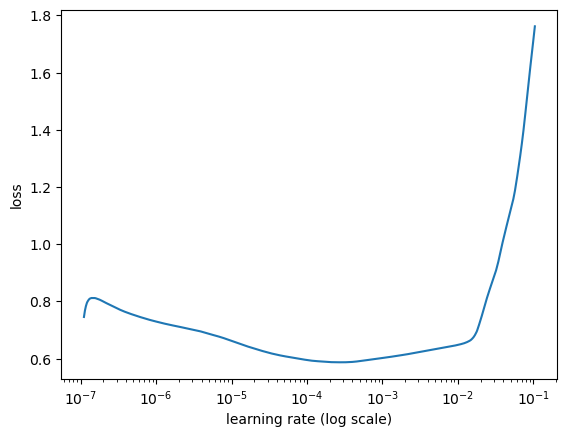

In [31]:
learner.lr_plot()

We notice that best learning rate for the model is 1e-3 

In [33]:
learner.autofit(1e-5)


early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
2500/2500 [==============================] - 683s 269ms/step - loss: 0.4265 - accuracy: 0.7929 - val_loss: 0.3486 - val_accuracy: 0.8419
Epoch 2/1024
2500/2500 [==============================] - 669s 267ms/step - loss: 0.2990 - accuracy: 0.8693 - val_loss: 0.3387 - val_accuracy: 0.8523
Epoch 3/1024
2500/2500 [==============================] - 668s 267ms/step - loss: 0.2236 - accuracy: 0.9078 - val_loss: 0.3675 - val_accuracy: 0.8534
Epoch 4/1024
2500/2500 [==============================] - ETA: 0s - loss: 0.1541 - accuracy: 0.9410
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 5e-06 (if not early_stopping).
2500/2500 [==============================] - 669s 267ms/step - loss: 0.1541 - accuracy: 0.9410 - val_loss: 0.4039 - val_accuracy: 0.8536
Epoch 5/1024
2500/2500 [==============

We can see that the model performed a perfect result with 0.85 f1 score 

In [40]:
learner.validate(val_data=(x_valid_bert, y_valid_bert), class_names=['negative', 'positive'])


313/313 [==============================] - 46s 148ms/step
              precision    recall  f1-score   support

    negative       0.87      0.82      0.85      5000
    positive       0.83      0.88      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



array([[4120,  880],
       [ 597, 4403]])

# Making predictions on Test Data

In [41]:
# getting predictor variable
predictor = ktrain.get_predictor(learner.model, preproc)
     

learner.print_layers()

0 (trainable=True) : <keras.engine.input_layer.InputLayer object at 0x79b87d61ae00>
1 (trainable=True) : <keras.engine.input_layer.InputLayer object at 0x79b87d61b280>
2 (trainable=True) : <keras_bert.layers.embedding.TokenEmbedding object at 0x79b87d61b670>
3 (trainable=True) : <keras.layers.core.embedding.Embedding object at 0x79b87d61b970>
4 (trainable=True) : <keras.layers.merging.add.Add object at 0x79b87d61bc70>
5 (trainable=True) : <keras_pos_embd.pos_embd.PositionEmbedding object at 0x79b87d61ba90>
6 (trainable=True) : <keras.layers.regularization.dropout.Dropout object at 0x79b4c5365600>
7 (trainable=True) : <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x79b87d61ad10>
8 (trainable=True) : <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x79b8771b2800>
9 (trainable=True) : <keras.layers.regularization.dropout.Dropout object at 0x79b8771b2b60>
10 (trainable=True) : <keras.layers.merging.add.Add object at 0x79b8771b1720>
11 (trai

In [42]:
df["reviews predicted"] = predictor.predict(df["review"].tolist())


In [43]:
def get_prediction(text):
    y_pred=predictor.predict(text)
    if y_pred=='1':
        print("postive")
    else:
        print("negative")

In [44]:
get_prediction("the movie was so greate i enjoyed watching it")

postive


In [45]:
get_prediction("the movie was horrible i didn't finish it half")

negative
